# Importing Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
import sklearn

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Metrics
from sklearn.metrics import fbeta_score

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Title - Metadata & Sentiment Features

In [169]:
news = pd.read_csv("news_final.csv")
news.head()

,title,text,subject,date,fake,all_text,char_count,word_count,sent_count,capital_word_count,...,stopword_count.1,unique_word_count.1,punct_count.1,avg_wordlength.1,avg_sentlength.1,unique_vs_words.1,stopwords_vs_words.1,noun_count.1,adverb_count.1,sentiment_score.1
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...,2973,507,26,5,...,2,12,1,6.583333,12.0,1.0,0.166667,5,0,-0.7096
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...,1968,313,11,3,...,0,8,0,8.625000,8.0,1.0,0.000000,5,0,-0.3400
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...,3688,595,25,42,...,0,15,0,6.000000,15.0,1.0,0.000000,7,0,-0.2960
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...,2853,458,15,6,...,1,14,2,5.571429,14.0,1.0,0.071429,3,2,-0.3052
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...,2417,431,19,0,...,0,11,0,6.363636,11.0,1.0,0.000000,5,1,0.0000


In [170]:
X_title = news.iloc[:,22:]
y_title = news['fake']

## Train Test Split 

In [171]:
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title, y_title, test_size=0.2, shuffle=True, random_state=1) #20% test

## Model Building

### 1.1 Logistic Regression

In [172]:
%%time
lr_clf_title = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=1))
])

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
lr_cv_results_title = cross_validate(lr_clf_title, X_train_title, y_train_title, cv=cv, return_train_score=True)

CPU times: user 5.47 s, sys: 252 ms, total: 5.72 s
Wall time: 1.79 s


In [173]:
lr_cv_results_title

{'fit_time': array([0.22732019, 0.13823581, 0.16004777, 0.14543414, 0.14103508,
        0.12713909, 0.19673491, 0.14453602, 0.19278193, 0.14120197]),
 'score_time': array([0.00604391, 0.00313711, 0.00378013, 0.00405788, 0.00387192,
        0.00301075, 0.00368214, 0.00300694, 0.005054  , 0.00322294]),
 'test_score': array([0.94002586, 0.94794698, 0.94406725, 0.94148076, 0.94180407,
        0.94358228, 0.94115745, 0.94228904, 0.94083414, 0.9442289 ]),
 'train_score': array([0.9434519 , 0.94135004, 0.94232013, 0.94320938, 0.94288601,
        0.94211803, 0.94316896, 0.94292643, 0.94292643, 0.94236055])}

In [174]:
print(f'Time for fitting classifier on the train set: {lr_cv_results_title["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {lr_cv_results_title["score_time"].mean()}')
print(f'Accuracy of Train: {lr_cv_results_title["train_score"].mean()}')
print(f'Accuracy of Validation: {lr_cv_results_title["test_score"].mean()}')

Time for fitting classifier on the train set: 0.1614466905593872
Time for scoring classifier on the validation set: 0.003886771202087402
Accuracy of Train: 0.9426717865804365
Accuracy of Validation: 0.9427416747494343


### 1.2 Naive Bayes

In [175]:
%%time
gnb_clf_title = Pipeline([
    ('scale', Normalizer()),
    ('clf', GaussianNB())
])

gnb_cv_results_title = cross_validate(gnb_clf_title, X_train_title, y_train_title, cv=cv, return_train_score=True)

CPU times: user 306 ms, sys: 53.5 ms, total: 359 ms
Wall time: 397 ms


In [176]:
gnb_cv_results_title

{'fit_time': array([0.04850698, 0.02761197, 0.02215505, 0.01647997, 0.01595807,
        0.01610494, 0.01665711, 0.01710296, 0.01705813, 0.01717496]),
 'score_time': array([0.00987411, 0.00576782, 0.00468183, 0.00413227, 0.00356722,
        0.00329304, 0.0039711 , 0.00424623, 0.00447989, 0.00395107]),
 'test_score': array([0.92935661, 0.93598448, 0.93404462, 0.92870999, 0.92709344,
        0.93452958, 0.93178144, 0.93129648, 0.93388296, 0.93614614]),
 'train_score': array([0.93298302, 0.93168957, 0.93136621, 0.9327405 , 0.92914309,
        0.93168957, 0.93221504, 0.93367017, 0.93229588, 0.93080032])}

In [177]:
print(f'Time for fitting classifier on the train set: {gnb_cv_results_title["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {gnb_cv_results_title["score_time"].mean()}')
print(f'Accuracy of Train: {gnb_cv_results_title["train_score"].mean()}')
print(f'Accuracy of Validation: {gnb_cv_results_title["test_score"].mean()}')

Time for fitting classifier on the train set: 0.021481013298034667
Time for scoring classifier on the validation set: 0.004796457290649414
Accuracy of Train: 0.9318593371059013
Accuracy of Validation: 0.9322825735531847


### 1.3 SVM

In [178]:
%%time

svm_clf_title = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(random_state=1))
])

svm_cv_results_title = cross_validate(svm_clf_title, X_train_title, y_train_title, cv=cv, return_train_score=True)

CPU times: user 2min 39s, sys: 3.21 s, total: 2min 43s
Wall time: 2min 53s


In [179]:
svm_cv_results_title

{'fit_time': array([5.72799397, 6.59531283, 6.50450921, 6.0985961 , 5.65303707,
        5.25333309, 5.37656808, 5.80337214, 5.04182673, 5.40926576]),
 'score_time': array([2.94990206, 3.25477624, 2.1506567 , 2.49745703, 2.13563609,
        2.53773785, 2.17244697, 2.87672758, 2.13520002, 2.76837111]),
 'test_score': array([0.94746201, 0.95457485, 0.95489816, 0.95376657, 0.95134174,
        0.95279664, 0.9500485 , 0.95085677, 0.95279664, 0.9547365 ]),
 'train_score': array([0.95533549, 0.95408246, 0.95347615, 0.95363783, 0.95468876,
        0.95412288, 0.95464834, 0.95485044, 0.95444624, 0.95359741])}

In [180]:
print(f'Time for fitting classifier on the train set: {svm_cv_results_title["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {svm_cv_results_title["score_time"].mean()}')
print(f'Accuracy of Train: {svm_cv_results_title["train_score"].mean()}')
print(f'Accuracy of Validation: {svm_cv_results_title["test_score"].mean()}')

Time for fitting classifier on the train set: 5.746381497383117
Time for scoring classifier on the validation set: 2.5478911638259887
Accuracy of Train: 0.9542886014551334
Accuracy of Validation: 0.9523278370514063


### 1.4 Random Forest

In [181]:
%%time

rf_clf_title = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=1))
])

rf_cv_results_title = cross_validate(rf_clf_title, X_train_title, y_train_title, cv=cv, return_train_score=True)

CPU times: user 19.6 s, sys: 463 ms, total: 20 s
Wall time: 20.7 s


In [182]:
rf_cv_results_title

{'fit_time': array([1.79354215, 1.58429289, 1.63965893, 1.5759449 , 1.56427526,
        1.587116  , 1.61470008, 1.78984809, 1.77116919, 1.63213611]),
 'score_time': array([0.09211016, 0.08841014, 0.09840488, 0.08884001, 0.08631277,
        0.09278011, 0.09026599, 0.09121585, 0.10570073, 0.1050539 ]),
 'test_score': array([0.94374394, 0.94827029, 0.94616877, 0.94697704, 0.9409958 ,
        0.94746201, 0.94390559, 0.94390559, 0.94633042, 0.94616877]),
 'train_score': array([0.99882781, 0.99890865, 0.99907033, 0.99882781, 0.99894907,
        0.99890865, 0.99866613, 0.99894907, 0.99894907, 0.99882781])}

In [183]:
print(f'Time for fitting classifier on the train set: {rf_cv_results_title["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {rf_cv_results_title["score_time"].mean()}')
print(f'Accuracy of Train: {rf_cv_results_title["train_score"].mean()}')
print(f'Accuracy of Validation: {rf_cv_results_title["test_score"].mean()}')

Time for fitting classifier on the train set: 1.6552683591842652
Time for scoring classifier on the validation set: 0.09390945434570312
Accuracy of Train: 0.9988884397736459
Accuracy of Validation: 0.945392822502425


### 1.5 XGBoost

In [184]:
%%time

xgboost_clf_title = Pipeline([
    ('scale', StandardScaler()),
    ('clf', XGBClassifier(random_state=1))
])

xgboost_cv_results_title = cross_validate(xgboost_clf_title, X_train_title, y_train_title, cv=cv, return_train_score=True)

CPU times: user 10.8 s, sys: 243 ms, total: 11.1 s
Wall time: 11.5 s


In [185]:
xgboost_cv_results_title

{'fit_time': array([1.15807486, 1.07433295, 1.01152802, 1.10186911, 1.07798386,
        1.03489208, 1.0374651 , 1.00834298, 1.03008628, 1.03859878]),
 'score_time': array([0.02888107, 0.01676798, 0.01683998, 0.01706982, 0.01749015,
        0.01818299, 0.01767874, 0.01666403, 0.01661587, 0.0168252 ]),
 'test_score': array([0.94519884, 0.95085677, 0.95118008, 0.94988684, 0.94600711,
        0.95101843, 0.94843194, 0.94681539, 0.94827029, 0.95053346]),
 'train_score': array([0.9525869 , 0.95133387, 0.95161681, 0.95226354, 0.95323363,
        0.95153597, 0.95291027, 0.95181892, 0.95157639, 0.95185934])}

In [186]:
print(f'Time for fitting classifier on the train set: {xgboost_cv_results_title["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {xgboost_cv_results_title["score_time"].mean()}')
print(f'Accuracy of Train: {xgboost_cv_results_title["train_score"].mean()}')
print(f'Accuracy of Validation: {xgboost_cv_results_title["test_score"].mean()}')

Time for fitting classifier on the train set: 1.0573173999786376
Time for scoring classifier on the validation set: 0.01830158233642578
Accuracy of Train: 0.9520735650767987
Accuracy of Validation: 0.9488199159392176


## Storing Title Results

In [187]:
results_title = pd.DataFrame(index=['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Random Forest', 'XGBoost'])

results_title.loc['Logistic Regression', 'train_acc'] = lr_cv_results_title["train_score"].mean()
results_title.loc['Logistic Regression', 'val_acc'] = lr_cv_results_title["test_score"].mean()
results_title.loc['Logistic Regression', 'fit_time'] = lr_cv_results_title["fit_time"].mean()

results_title.loc['Gaussian Naive Bayes', 'train_acc'] = gnb_cv_results_title["train_score"].mean()
results_title.loc['Gaussian Naive Bayes', 'val_acc'] = gnb_cv_results_title["test_score"].mean()
results_title.loc['Gaussian Naive Bayes', 'fit_time'] = gnb_cv_results_title["fit_time"].mean()

results_title.loc['Support Vector Machine', 'train_acc'] = svm_cv_results_title["train_score"].mean()
results_title.loc['Support Vector Machine', 'val_acc'] = svm_cv_results_title["test_score"].mean()
results_title.loc['Support Vector Machine', 'fit_time'] = svm_cv_results_title["fit_time"].mean()

results_title.loc['Random Forest', 'train_acc'] = rf_cv_results_title["train_score"].mean()
results_title.loc['Random Forest', 'val_acc'] = rf_cv_results_title["test_score"].mean()
results_title.loc['Random Forest', 'fit_time'] = rf_cv_results_title["fit_time"].mean()

results_title.loc['XGBoost', 'train_acc'] = xgboost_cv_results_title["train_score"].mean()
results_title.loc['XGBoost', 'val_acc'] = xgboost_cv_results_title["test_score"].mean()
results_title.loc['XGBoost', 'fit_time'] = xgboost_cv_results_title["fit_time"].mean()

In [188]:
results_title

,train_acc,val_acc,fit_time
Logistic Regression,0.942672,0.942742,0.161447
Gaussian Naive Bayes,0.931859,0.932283,0.021481
Support Vector Machine,0.954289,0.952328,5.746381
Random Forest,0.998888,0.945393,1.655268
XGBoost,0.952074,0.948820,1.057317


# 2. All Text - Metadata & Sentiment Features

In [189]:
X = news.iloc[:,6:21]
y = news['fake']

In [190]:
X.head()

,char_count,word_count,sent_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,noun_count,adverb_count,sentiment_score
0,2973,507,26,5,0,195,282,122,5.863905,19.500000,0.556213,0.384615,116,36,-0.9139
1,1968,313,11,3,0,120,209,39,6.287540,28.454545,0.667732,0.383387,94,10,-0.7685
2,3688,595,25,42,0,220,344,148,6.198319,23.800000,0.578151,0.369748,167,20,-0.9955
3,2853,458,15,6,0,164,278,120,6.229258,30.533333,0.606987,0.358079,143,24,-0.9269
4,2417,431,19,0,0,197,244,40,5.607889,22.684211,0.566125,0.457077,79,16,0.3134


## Train Test Split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 1) #20% test

## Model Building

### 2.1 Logistic Regression

In [192]:
%%time 

lr_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=1))
])

lr_cv_results = cross_validate(lr_clf, X_train, y_train, cv=cv, return_train_score=True)

/Users/jiawei/opt/anaconda3/envs/BT4222/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jiawei/opt/anaconda3/envs/BT4222/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

CPU times: user 6.24 s, sys: 197 ms, total: 6.43 s
Wall time: 1.82 s


In [193]:
lr_cv_results

{'fit_time': array([0.23655081, 0.14119411, 0.16058373, 0.16400266, 0.15843105,
        0.16104603, 0.16004109, 0.16504216, 0.1782949 , 0.1725359 ]),
 'score_time': array([0.00900722, 0.0040319 , 0.00311208, 0.00275135, 0.00343394,
        0.00328088, 0.00243807, 0.00293899, 0.00319719, 0.00219512]),
 'test_score': array([0.86129971, 0.85693501, 0.8533786 , 0.86663434, 0.86420951,
        0.8580666 , 0.85984481, 0.86744261, 0.85305529, 0.86372454]),
 'train_score': array([0.86046888, 0.85877122, 0.86176233, 0.8589329 , 0.85856912,
        0.86046888, 0.85957963, 0.85711399, 0.86228779, 0.85877122])}

In [194]:
print(f'Time for fitting classifier on the train set: {lr_cv_results["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {lr_cv_results["score_time"].mean()}')
print(f'Accuracy of Train: {lr_cv_results["train_score"].mean()}')
print(f'Accuracy of Validation: {lr_cv_results["test_score"].mean()}')

Time for fitting classifier on the train set: 0.16977224349975586
Time for scoring classifier on the validation set: 0.0036386728286743166
Accuracy of Train: 0.8596725949878741
Accuracy of Validation: 0.8604591011962496


### 2.2 Naive Bayes

In [195]:
%%time

gnb_clf = Pipeline([
    ('scale', Normalizer()),
    ('clf', GaussianNB())
])

gnb_cv_results = cross_validate(gnb_clf, X_train, y_train, cv=cv, return_train_score=True)

CPU times: user 251 ms, sys: 38.8 ms, total: 290 ms
Wall time: 300 ms


In [196]:
gnb_cv_results

{'fit_time': array([0.01720905, 0.01551509, 0.01458716, 0.01413774, 0.01461315,
        0.01677179, 0.01830816, 0.01642871, 0.01694107, 0.01513028]),
 'score_time': array([0.00341082, 0.00400901, 0.00268602, 0.00295711, 0.00343585,
        0.00306106, 0.00317788, 0.003052  , 0.0030489 , 0.00305295]),
 'test_score': array([0.69915939, 0.70400905, 0.68913676, 0.68461041, 0.6933398 ,
        0.68962173, 0.69689622, 0.6962496 , 0.6871969 , 0.69608794]),
 'train_score': array([0.69122878, 0.70145513, 0.68823767, 0.68864188, 0.68569119,
        0.69409863, 0.69090542, 0.69664511, 0.69353274, 0.68755053])}

In [197]:
print(f'Time for fitting classifier on the train set: {gnb_cv_results["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {gnb_cv_results["score_time"].mean()}')
print(f'Accuracy of Train: {gnb_cv_results["train_score"].mean()}')
print(f'Accuracy of Validation: {gnb_cv_results["test_score"].mean()}')

Time for fitting classifier on the train set: 0.015964221954345704
Time for scoring classifier on the validation set: 0.0031891584396362303
Accuracy of Train: 0.6917987065481003
Accuracy of Validation: 0.6936307791787908


### 2.3 SVM

In [198]:
%%time

svm_clf = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(random_state=1))
])

svm_cv_results = cross_validate(svm_clf, X_train, y_train, cv=cv, return_train_score=True)

CPU times: user 5min 15s, sys: 5.18 s, total: 5min 20s
Wall time: 5min 37s


In [199]:
svm_cv_results

{'fit_time': array([10.42790174, 10.08165288, 11.47125721,  9.77438903, 10.04780912,
        11.0332551 ,  9.90249872, 10.13970613, 11.74428797, 11.12171006]),
 'score_time': array([4.88244319, 4.83103418, 4.46194983, 4.39220095, 4.32647181,
        4.42505693, 4.32710314, 4.89952803, 4.56853604, 4.56801891]),
 'test_score': array([0.90413838, 0.90171355, 0.90268348, 0.90656321, 0.90753314,
        0.90462334, 0.90413838, 0.909473  , 0.89896541, 0.91189783]),
 'train_score': array([0.90909458, 0.90901374, 0.90788197, 0.90743735, 0.90800323,
        0.90763945, 0.90747777, 0.90739693, 0.90978173, 0.90541633])}

In [200]:
print(f'Time for fitting classifier on the train set: {svm_cv_results["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {svm_cv_results["score_time"].mean()}')
print(f'Accuracy of Train: {svm_cv_results["train_score"].mean()}')
print(f'Accuracy of Validation: {svm_cv_results["test_score"].mean()}')

Time for fitting classifier on the train set: 10.57444679737091
Time for scoring classifier on the validation set: 4.568234300613403
Accuracy of Train: 0.907914308811641
Accuracy of Validation: 0.9051729712253476


### 2.4 Random Forest

In [201]:
%%time

rf_clf = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=1))
])

rf_cv_results = cross_validate(rf_clf, X_train, y_train, cv=cv, return_train_score=True)

CPU times: user 46.8 s, sys: 906 ms, total: 47.7 s
Wall time: 50 s


In [202]:
rf_cv_results

{'fit_time': array([4.33935189, 4.40321612, 4.93193078, 4.38624787, 4.21621895,
        4.216043  , 4.33225393, 4.32334304, 4.46649766, 4.88289714]),
 'score_time': array([0.10152912, 0.10531211, 0.10520291, 0.10737205, 0.10742497,
        0.10113382, 0.10184789, 0.25666499, 0.1852684 , 0.10705185]),
 'test_score': array([0.90139024, 0.90058196, 0.90203686, 0.90446169, 0.904785  ,
        0.90397672, 0.90543162, 0.90575493, 0.89993534, 0.91319108]),
 'train_score': array([1.        , 0.99995958, 0.99995958, 1.        , 0.99995958,
        0.99995958, 1.        , 1.        , 1.        , 1.        ])}

In [203]:
print(f'Time for fitting classifier on the train set: {rf_cv_results["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {rf_cv_results["score_time"].mean()}')
print(f'Accuracy of Train: {rf_cv_results["train_score"].mean()}')
print(f'Accuracy of Validation: {rf_cv_results["test_score"].mean()}')

Time for fitting classifier on the train set: 4.449800038337708
Time for scoring classifier on the validation set: 0.12788081169128418
Accuracy of Train: 0.9999838318512531
Accuracy of Validation: 0.9041545425153572


### 2.5 XGBoost

In [204]:
%%time

xgboost_clf = Pipeline([
    ('scale', StandardScaler()),
    ('clf', XGBClassifier(random_state=1))
])

xgboost_cv_results = cross_validate(xgboost_clf, X_train, y_train, cv=cv, return_train_score=True)

CPU times: user 15.4 s, sys: 341 ms, total: 15.7 s
Wall time: 16.3 s


In [205]:
xgboost_cv_results

{'fit_time': array([1.77037215, 1.6139431 , 1.52487278, 1.57911825, 1.54296899,
        1.48573995, 1.43823791, 1.48236704, 1.444175  , 1.4550631 ]),
 'score_time': array([0.02137399, 0.01934075, 0.01946807, 0.02221298, 0.0184629 ,
        0.01910305, 0.02005219, 0.01961088, 0.01861405, 0.02069902]),
 'test_score': array([0.89104429, 0.89185257, 0.89395409, 0.89945037, 0.8942774 ,
        0.89460071, 0.89476237, 0.90074361, 0.89314581, 0.90607824]),
 'train_score': array([0.90626516, 0.90505255, 0.90412288, 0.90307195, 0.90493129,
        0.90323363, 0.90388036, 0.90254648, 0.9041633 , 0.90194018])}

In [206]:
print(f'Time for fitting classifier on the train set: {xgboost_cv_results["fit_time"].mean()}')
print(f'Time for scoring classifier on the validation set: {xgboost_cv_results["score_time"].mean()}')
print(f'Accuracy of Train: {xgboost_cv_results["train_score"].mean()}')
print(f'Accuracy of Validation: {xgboost_cv_results["test_score"].mean()}')

Time for fitting classifier on the train set: 1.533685827255249
Time for scoring classifier on the validation set: 0.019893789291381837
Accuracy of Train: 0.9039207760711401
Accuracy of Validation: 0.8959909473003556


## Storing All Text Results

In [207]:
results_all_text = pd.DataFrame(index=['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Random Forest', 'XGBoost'])

results_all_text.loc['Logistic Regression', 'train_acc'] = lr_cv_results["train_score"].mean()
results_all_text.loc['Logistic Regression', 'val_acc'] = lr_cv_results["test_score"].mean()
results_all_text.loc['Logistic Regression', 'fit_time'] = lr_cv_results["fit_time"].mean()

results_all_text.loc['Gaussian Naive Bayes', 'train_acc'] = gnb_cv_results["train_score"].mean()
results_all_text.loc['Gaussian Naive Bayes', 'val_acc'] = gnb_cv_results["test_score"].mean()
results_all_text.loc['Gaussian Naive Bayes', 'fit_time'] = gnb_cv_results["fit_time"].mean()

results_all_text.loc['Support Vector Machine', 'train_acc'] = svm_cv_results["train_score"].mean()
results_all_text.loc['Support Vector Machine', 'val_acc'] = svm_cv_results["test_score"].mean()
results_all_text.loc['Support Vector Machine', 'fit_time'] = svm_cv_results["fit_time"].mean()

results_all_text.loc['Random Forest', 'train_acc'] = rf_cv_results["train_score"].mean()
results_all_text.loc['Random Forest', 'val_acc'] = rf_cv_results["test_score"].mean()
results_all_text.loc['Random Forest', 'fit_time'] = rf_cv_results["fit_time"].mean()

results_all_text.loc['XGBoost', 'train_acc'] = xgboost_cv_results["train_score"].mean()
results_all_text.loc['XGBoost', 'val_acc'] = xgboost_cv_results["test_score"].mean()
results_all_text.loc['XGBoost', 'fit_time'] = xgboost_cv_results["fit_time"].mean()

In [208]:
results_all_text

,train_acc,val_acc,fit_time
Logistic Regression,0.859673,0.860459,0.169772
Gaussian Naive Bayes,0.691799,0.693631,0.015964
Support Vector Machine,0.907914,0.905173,10.574447
Random Forest,0.999984,0.904155,4.449800
XGBoost,0.903921,0.895991,1.533686


# 3. Comparing Validation Accuracy and Fit Time

In [209]:
from IPython.display import display_html 

results_title_style = results_title.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Title Only")
results_all_text_style = results_all_text.style.set_table_attributes("style='display:inline'").set_caption("Title & Text")

display_html(results_title_style._repr_html_() + results_all_text_style._repr_html_(), raw=True)

,train_acc,val_acc,fit_time
Logistic Regression,0.942672,0.942742,0.161447
Gaussian Naive Bayes,0.931859,0.932283,0.021481
Support Vector Machine,0.954289,0.952328,5.746381
Random Forest,0.998888,0.945393,1.655268
XGBoost,0.952074,0.948820,1.057317
,train_acc,val_acc,fit_time
Logistic Regression,0.859673,0.860459,0.169772
Gaussian Naive Bayes,0.691799,0.693631,0.015964
Support Vector Machine,0.907914,0.905173,10.574447
Random Forest,0.999984,0.904155,4.449800


1. SVM takes the longest to fit across both experiments
2. For title only, although SVM performed the best, XGBoost wasn't far off in terms of validation accuracy and took 6.5 times less to fit
3. For all text, although SVM performed the best, the long fitting time dissauades us from using it, instead XGBoost or even Random Forest would be a better choice
4. On average, validation accuracy for title is higher than that of all text, hence we could say that we are able to predict if an article is real based on the title alone

# 4. Title - Test Accuracy

In [210]:
results_title_final = pd.DataFrame(index=['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Random Forest', 'XGBoost'])

In [211]:
# Linear Regression
lr_clf_title = sklearn.base.clone(lr_clf_title)
lr_clf_title.fit(X_train_title, y_train_title)
lr_clf_title_train_acc = lr_clf_title.score(X_train_title, y_train_title)
lr_clf_title_test_acc = lr_clf_title.score(X_test_title, y_test_title)
results_title_final.loc['Logistic Regression', 'train_acc'] = lr_clf_title_train_acc
results_title_final.loc['Logistic Regression', 'test_acc'] = lr_clf_title_test_acc
lr_y_pred_title = lr_clf_title.predict(X_test_title)
results_title_final.loc['Logistic Regression', 'F1-Weighted'] = fbeta_score(y_test_title, lr_y_pred_title, beta=1, average="weighted")
results_title_final.loc['Logistic Regression', 'F2-Weighted'] = fbeta_score(y_test_title, lr_y_pred_title, beta=2, average="weighted")


# Naive Bayes
gnb_clf_title = sklearn.base.clone(gnb_clf_title)
gnb_clf_title.fit(X_train_title, y_train_title)
gnb_clf_title_train_acc = gnb_clf_title.score(X_train_title, y_train_title)
gnb_clf_title_test_acc = gnb_clf_title.score(X_test_title, y_test_title)
results_title_final.loc['Gaussian Naive Bayes', 'train_acc'] = gnb_clf_title_train_acc
results_title_final.loc['Gaussian Naive Bayes', 'test_acc'] = gnb_clf_title_test_acc
gnb_y_pred_title = gnb_clf_title.predict(X_test_title)
results_title_final.loc['Gaussian Naive Bayes', 'F1-Weighted'] = fbeta_score(y_test_title, gnb_y_pred_title, beta=1, average="weighted")
results_title_final.loc['Gaussian Naive Bayes', 'F2-Weighted'] = fbeta_score(y_test_title, gnb_y_pred_title, beta=2, average="weighted")

# SVM
svm_clf_title = sklearn.base.clone(svm_clf_title)
svm_clf_title.fit(X_train_title, y_train_title)
svm_clf_title_train_acc = svm_clf_title.score(X_train_title, y_train_title)
svm_clf_title_test_acc = svm_clf_title.score(X_test_title, y_test_title)
results_title_final.loc['Support Vector Machine', 'train_acc'] = svm_clf_title_train_acc
results_title_final.loc['Support Vector Machine', 'test_acc'] = svm_clf_title_test_acc
svm_y_pred_title = svm_clf_title.predict(X_test_title)
results_title_final.loc['Support Vector Machine', 'F1-Weighted'] = fbeta_score(y_test_title, svm_y_pred_title, beta=1, average="weighted")
results_title_final.loc['Support Vector Machine', 'F2-Weighted'] = fbeta_score(y_test_title, svm_y_pred_title, beta=2, average="weighted")

# Random Forest
rf_clf_title = sklearn.base.clone(rf_clf_title)
rf_clf_title.fit(X_train_title, y_train_title)
rf_clf_title_train_acc = rf_clf_title.score(X_train_title, y_train_title)
rf_clf_title_test_acc = rf_clf_title.score(X_test_title, y_test_title)
results_title_final.loc['Random Forest', 'train_acc'] = rf_clf_title_train_acc
results_title_final.loc['Random Forest', 'test_acc'] = rf_clf_title_test_acc
rf_y_pred_title = rf_clf_title.predict(X_test_title)
results_title_final.loc['Random Forest', 'F1-Weighted'] = fbeta_score(y_test_title, rf_y_pred_title, beta=1, average="weighted")
results_title_final.loc['Random Forest', 'F2-Weighted'] = fbeta_score(y_test_title, rf_y_pred_title, beta=2, average="weighted")

# XGBoost
xgboost_clf_title = sklearn.base.clone(xgboost_clf_title)
xgboost_clf_title.fit(X_train_title, y_train_title)
xgboost_clf_title_train_acc = xgboost_clf_title.score(X_train_title, y_train_title)
xgboost_clf_title_test_acc = xgboost_clf_title.score(X_test_title, y_test_title)
results_title_final.loc['XGBoost', 'train_acc'] = xgboost_clf_title_train_acc
results_title_final.loc['XGBoost', 'test_acc'] = xgboost_clf_title_test_acc
xgboost_y_pred_title = xgboost_clf_title.predict(X_test_title)
results_title_final.loc['XGBoost', 'F1-Weighted'] = fbeta_score(y_test_title, xgboost_y_pred_title, beta=1, average="weighted")
results_title_final.loc['XGBoost', 'F2-Weighted'] = fbeta_score(y_test_title, xgboost_y_pred_title, beta=2, average="weighted")

results_title_final


,train_acc,test_acc,F1-Weighted,F2-Weighted
Logistic Regression,0.942896,0.945292,0.945169,0.945144
Gaussian Naive Bayes,0.931773,0.930031,0.929666,0.929516
Support Vector Machine,0.954116,0.953440,0.953305,0.953235
Random Forest,0.998739,0.945163,0.945058,0.945046
XGBoost,0.951303,0.949302,0.949171,0.949125


# 5. All Text - Test Accuracy

In [212]:
results_all_final = pd.DataFrame(index=['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Random Forest', 'XGBoost'])

In [213]:
# Linear Regression
lr_clf = sklearn.base.clone(lr_clf)
lr_clf.fit(X_train, y_train)
lr_all_train_acc = lr_clf.score(X_train, y_train)
lr_all_test_acc = lr_clf.score(X_test, y_test)
results_all_final.loc['Logistic Regression', 'train_acc'] = lr_all_train_acc
results_all_final.loc['Logistic Regression', 'test_acc'] = lr_all_test_acc
lr_y_pred = lr_clf.predict(X_test)
results_all_final.loc['Logistic Regression', 'F1-Weighted'] = fbeta_score(y_test, lr_y_pred, beta=1, average="weighted")
results_all_final.loc['Logistic Regression', 'F2-Weighted'] = fbeta_score(y_test, lr_y_pred, beta=2, average="weighted")

# Naive Bayes
gnb_clf = sklearn.base.clone(gnb_clf)
gnb_clf.fit(X_train, y_train)
gnb_all_train_acc = gnb_clf.score(X_train, y_train)
gnb_all_test_acc = gnb_clf.score(X_test, y_test)
results_all_final.loc['Gaussian Naive Bayes', 'train_acc'] = gnb_all_train_acc
results_all_final.loc['Gaussian Naive Bayes', 'test_acc'] = gnb_all_test_acc
gnb_y_pred = gnb_clf.predict(X_test)
results_all_final.loc['Gaussian Naive Bayes', 'F1-Weighted'] = fbeta_score(y_test, gnb_y_pred, beta=1, average="weighted")
results_all_final.loc['Gaussian Naive Bayes', 'F2-Weighted'] = fbeta_score(y_test, gnb_y_pred, beta=2, average="weighted")

# SVM
svm_clf = sklearn.base.clone(svm_clf)
svm_clf.fit(X_train, y_train)
svm_all_train_acc = svm_clf.score(X_train, y_train)
svm_all_test_acc = svm_clf.score(X_test, y_test)
results_all_final.loc['Support Vector Machine', 'train_acc'] = svm_all_train_acc
results_all_final.loc['Support Vector Machine', 'test_acc'] = svm_all_test_acc
svm_y_pred = svm_clf.predict(X_test)
results_all_final.loc['Support Vector Machine', 'F1-Weighted'] = fbeta_score(y_test, svm_y_pred, beta=1, average="weighted")
results_all_final.loc['Support Vector Machine', 'F2-Weighted'] = fbeta_score(y_test, svm_y_pred, beta=2, average="weighted")

# Random Forest
rf_clf = sklearn.base.clone(rf_clf)
rf_clf.fit(X_train, y_train)
rf_all_train_acc = rf_clf.score(X_train, y_train)
rf_all_test_acc = rf_clf.score(X_test, y_test)
results_all_final.loc['Random Forest', 'train_acc'] = rf_all_train_acc
results_all_final.loc['Random Forest', 'test_acc'] = rf_all_test_acc
rf_y_pred = rf_clf.predict(X_test)
results_all_final.loc['Random Forest', 'F1-Weighted'] = fbeta_score(y_test, rf_y_pred, beta=1, average="weighted")
results_all_final.loc['Random Forest', 'F2-Weighted'] = fbeta_score(y_test, rf_y_pred, beta=2, average="weighted")

# XGBoost
xgboost_clf = sklearn.base.clone(xgboost_clf)
xgboost_clf.fit(X_train, y_train)
xgboost_all_train_acc = xgboost_clf.score(X_train, y_train)
xgboost_all_test_acc = xgboost_clf.score(X_test, y_test)
results_all_final.loc['XGBoost', 'train_acc'] = xgboost_all_train_acc
results_all_final.loc['XGBoost', 'test_acc'] = xgboost_all_test_acc
xgboost_y_pred = xgboost_clf.predict(X_test)
results_all_final.loc['XGBoost', 'F1-Weighted'] = fbeta_score(y_test, xgboost_y_pred, beta=1, average="weighted")
results_all_final.loc['XGBoost', 'F2-Weighted'] = fbeta_score(y_test, xgboost_y_pred, beta=2, average="weighted")

results_all_final

,train_acc,test_acc,F1-Weighted,F2-Weighted
Logistic Regression,0.859891,0.850362,0.849962,0.850085
Gaussian Naive Bayes,0.689614,0.696198,0.672898,0.678883
Support Vector Machine,0.908491,0.896793,0.896624,0.896671
Random Forest,1.000000,0.900802,0.900746,0.900771
XGBoost,0.903673,0.886834,0.886547,0.886607


In [ ]:
results_title_style = results_title_final.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Title Only")
results_all_text_style = results_all_final.style.set_table_attributes("style='display:inline'").set_caption("Title & Text")

display_html(results_title_style._repr_html_() + results_all_text_style._repr_html_(), raw=True)

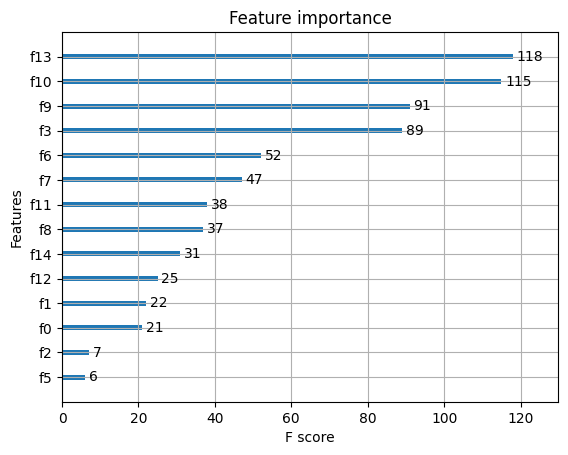

In [264]:
from xgboost import plot_importance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(random_state=1)
model.fit(X_train_scaled,y_train)
plot_importance(model)
plt.show()

Feature importance in descending order: adverb_count, unique_vs_words, avg_sentlength, capital_word_count, unique_word_count, punct_count, stopwords_vs_words, avg_wordlength, sentiment_score, noun_count, word_count, char_count, sent_count, stopword_count

In [244]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(random_state=1)
model.fit(X_train_scaled,y_train)
print(f"test_acc: {model.score(X_test_scaled, y_test)}")
y_pred = model.predict(X_test_scaled)
print(f"f2-score: {fbeta_score(y_test, y_pred, beta=2, average='weighted')}")

# Fit model using each importance as a threshold

thresholds = sort(model.feature_importances_)

for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_scaled)
    select_X_test = selection.transform(X_test_scaled)

    selection_model = XGBClassifier(random_state=1)
    selection_model.fit(select_X_train, y_train)

    select_y_pred = selection_model.predict(select_X_test)
    test_acc = selection_model.score(select_X_test, y_test)
    f2_score = fbeta_score(y_test, select_y_pred, beta=2, average='weighted')
    n_features = select_X_train.shape[1]
    print(f"Thres={round(thresh,4)}, n={n_features}, test_acc={round(test_acc,4)}, f2-score={round(f2_score,4)}")

test_acc: 0.8868339368856699
f2-score: 0.886607083478792
Thres=0.0, n=15, test_acc=0.8868, f2-score=0.8866
Thres=0.00860000029206276, n=14, test_acc=0.8868, f2-score=0.8866
Thres=0.009999999776482582, n=13, test_acc=0.8863, f2-score=0.8861
Thres=0.029999999329447746, n=12, test_acc=0.8871, f2-score=0.8869
Thres=0.03150000050663948, n=11, test_acc=0.8886, f2-score=0.8884
Thres=0.03579999879002571, n=10, test_acc=0.8868, f2-score=0.8866
Thres=0.04430000111460686, n=9, test_acc=0.8863, f2-score=0.8861
Thres=0.05290000140666962, n=8, test_acc=0.8837, f2-score=0.8835
Thres=0.0544000007212162, n=7, test_acc=0.8858, f2-score=0.8856
Thres=0.06719999760389328, n=6, test_acc=0.8654, f2-score=0.8652
Thres=0.07440000027418137, n=5, test_acc=0.8643, f2-score=0.8641
Thres=0.12729999423027039, n=4, test_acc=0.8289, f2-score=0.8287
Thres=0.13019999861717224, n=3, test_acc=0.8021, f2-score=0.8015
Thres=0.16449999809265137, n=2, test_acc=0.7607, f2-score=0.7602
Thres=0.1687999963760376, n=1, test_acc=0.

# 6. TF-IDF

## 6.1 All Text

In [19]:
X = news['all_text']
y = news['fake']

In [20]:
X.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: all_text, dtype: object

### 6.1.1 Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 1) #20% test

### 6.1.2 Transforming All Text to Vectors

In [22]:
vectorization = TfidfVectorizer()
X_train_vec = vectorization.fit_transform(X_train)
X_test_vec = vectorization.transform(X_test)

### 6.1.3 Model Building

In [24]:
nlp_results = {}

#### 6.1.3.1 Logistic Regression

In [27]:
LR = LogisticRegression()
LR.fit(X_train_vec, y_train)
LR_y_pred = LR.predict(X_test_vec)
nlp_results['LR'] = [LR.score(X_train_vec, y_train), LR.score(X_test_vec, y_test),
                    fbeta_score(y_test, LR_y_pred, beta=1, average="weighted"),
                    fbeta_score(y_test, LR_y_pred, beta=2, average="weighted")] 

#### 6.1.3.2 Naive Bayes

In [28]:
NB = MultinomialNB().fit(X_train_vec, y_train)
NB_y_pred = NB.predict(X_test_vec)
nlp_results['NB'] = [NB.score(X_train_vec, y_train), NB.score(X_test_vec, y_test),
                    fbeta_score(y_test, NB_y_pred, beta=1, average="weighted"),
                    fbeta_score(y_test, NB_y_pred, beta=2, average="weighted")] 

#### 6.1.3.3 SVM

In [29]:
SVM = SVC(kernel='rbf', gamma='scale', random_state=1)
SVM.fit(X_train_vec, y_train)
SVM_y_pred = SVM.predict(X_test_vec)
nlp_results['SVM'] = [SVM.score(X_train_vec, y_train), SVM.score(X_test_vec, y_test),
                    fbeta_score(y_test, SVM_y_pred, beta=1, average="weighted"),
                    fbeta_score(y_test, SVM_y_pred, beta=2, average="weighted")] 

#### 6.1.3.4 Random Forest

In [45]:
RFC = RandomForestClassifier(random_state=1)
RFC.fit(X_train_vec, y_train)
RFC_y_pred = RFC.predict(X_test_vec)
nlp_results['RFC'] = [RFC.score(X_train_vec, y_train), RFC.score(X_test_vec, y_test),
                    fbeta_score(y_test, RFC_y_pred, beta=1, average="weighted"),
                    fbeta_score(y_test, RFC_y_pred, beta=2, average="weighted")] 

#### 6.1.3.5 XGBoost

In [46]:
XGB = XGBClassifier(random_state=1)
XGB.fit(X_train_vec, y_train)
XGB_y_pred = XGB.predict(X_test_vec)
nlp_results['XGB'] = [XGB.score(X_train_vec, y_train), XGB.score(X_test_vec, y_test),
                    fbeta_score(y_test, XGB_y_pred, beta=1, average="weighted"),
                    fbeta_score(y_test, XGB_y_pred, beta=2, average="weighted")] 

In [47]:
print(nlp_results)

{'LR': [0.9884563150746944, 0.9811174340403518, 0.9811019939867537, 0.9810939676000798], 'NB': [0.9457737825777662, 0.9372736678737713, 0.9370971268692613, 0.9370618041501064], 'SVM': [0.99899760719136, 0.987325400931195, 0.9873183778800231, 0.9873141399806672], 'RFC': [1.0, 0.9714174857734093, 0.9713774371610956, 0.9713564636696664], 'XGB': [1.0, 0.987842731505432, 0.9878378375150025, 0.9878361546355087]}


### 6.1.4 Storing All Test TF-IDF Results

In [48]:
import pandas as pd
tfidf_results_all_text = pd.DataFrame()

tfidf_results_all_text.loc['Logistic Regression', 'train_acc'] = nlp_results['LR'][0]
tfidf_results_all_text.loc['Logistic Regression', 'test_acc'] = nlp_results['LR'][1]
tfidf_results_all_text.loc['Logistic Regression', 'F1-Weighted'] = nlp_results['LR'][2]
tfidf_results_all_text.loc['Logistic Regression', 'F2-Weighted'] = nlp_results['LR'][3]

tfidf_results_all_text.loc['Multinomial Naive Bayes', 'train_acc'] = nlp_results['NB'][0]
tfidf_results_all_text.loc['Multinomial Naive Bayes', 'test_acc'] = nlp_results['NB'][1]
tfidf_results_all_text.loc['Multinomial Naive Bayes', 'F1-Weighted'] = nlp_results['NB'][2]
tfidf_results_all_text.loc['Multinomial Naive Bayes', 'F2-Weighted'] = nlp_results['NB'][3]

tfidf_results_all_text.loc['Support Vector Machine', 'train_acc'] = nlp_results['SVM'][0]
tfidf_results_all_text.loc['Support Vector Machine', 'test_acc'] = nlp_results['SVM'][1]
tfidf_results_all_text.loc['Support Vector Machine', 'F1-Weighted'] = nlp_results['SVM'][2]
tfidf_results_all_text.loc['Support Vector Machine', 'F2-Weighted'] = nlp_results['SVM'][3]


tfidf_results_all_text.loc['Random Forest', 'train_acc'] = nlp_results['RFC'][0]
tfidf_results_all_text.loc['Random Forest', 'test_acc'] = nlp_results['RFC'][1]
tfidf_results_all_text.loc['Random Forest', 'F1-Weighted'] = nlp_results['RFC'][2]
tfidf_results_all_text.loc['Random Forest', 'F2-Weighted'] = nlp_results['RFC'][3]

tfidf_results_all_text.loc['XGBoost', 'train_acc'] = nlp_results['XGB'][0]
tfidf_results_all_text.loc['XGBoost', 'test_acc'] = nlp_results['XGB'][1]
tfidf_results_all_text.loc['XGBoost', 'F1-Weighted'] = nlp_results['XGB'][2]
tfidf_results_all_text.loc['XGBoost', 'F2-Weighted'] = nlp_results['XGB'][3]
tfidf_results_all_text

,train_acc,test_acc,F1-Weighted,F2-Weighted
Logistic Regression,0.988456,0.981117,0.981102,0.981094
Multinomial Naive Bayes,0.945774,0.937274,0.937097,0.937062
Support Vector Machine,0.998998,0.987325,0.987318,0.987314
Random Forest,1.000000,0.971417,0.971377,0.971356
XGBoost,1.000000,0.987843,0.987838,0.987836


## 6.2 Title

In [34]:
X2 = news['title']
y2 = news['fake']

In [35]:
X2.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title, dtype: object

### 6.2.1 Train Test Split

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, shuffle = True, random_state = 1) #20% test

### 6.2.2 Transforming Title to Vectors

In [37]:
# Converting text to vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization2 = TfidfVectorizer()
X_train_vec2 = vectorization2.fit_transform(X_train2)
X_test_vec2 = vectorization2.transform(X_test2)

### 6.2.3 Model Building

In [38]:
nlp_results_title = {}

#### 6.2.3.1 Logistic Regression

In [40]:
LR2 = LogisticRegression()
LR2.fit(X_train_vec2, y_train2)
LR_y_pred2 = LR2.predict(X_test_vec2)
nlp_results_title['LR'] = [LR2.score(X_train_vec2, y_train2), LR2.score(X_test_vec2, y_test2),
                    fbeta_score(y_test2, LR_y_pred2, beta=1, average="weighted"),
                    fbeta_score(y_test2, LR_y_pred2, beta=2, average="weighted")] 

#### 6.2.3.2 Naive Bayes

In [41]:
NB2 = MultinomialNB().fit(X_train_vec2, y_train2)
NB_y_pred2 = NB2.predict(X_test_vec2)
nlp_results_title['NB'] = [NB2.score(X_train_vec2, y_train2), NB2.score(X_test_vec2, y_test2),
                    fbeta_score(y_test2, NB_y_pred2, beta=1, average="weighted"),
                    fbeta_score(y_test2, NB_y_pred2, beta=2, average="weighted")] 

#### 6.2.3.3 SVM

In [42]:
from sklearn.svm import SVC

SVM2 = SVC(kernel='rbf', gamma='scale', random_state=1)
SVM2.fit(X_train_vec2, y_train2)
SVM_y_pred2 = SVM2.predict(X_test_vec2)
nlp_results_title['SVM'] = [SVM2.score(X_train_vec2, y_train2), SVM2.score(X_test_vec2, y_test2),
                    fbeta_score(y_test2, SVM_y_pred2, beta=1, average="weighted"),
                    fbeta_score(y_test2, SVM_y_pred2, beta=2, average="weighted")] 

#### 6.2.3.4 Random Forest

In [49]:
RFC2 = RandomForestClassifier(random_state=1)
RFC2.fit(X_train_vec2, y_train2)
RFC_y_pred2 = RFC2.predict(X_test_vec2)
nlp_results_title['RFC'] = [RFC2.score(X_train_vec2, y_train2), RFC2.score(X_test_vec2, y_test2),
                    fbeta_score(y_test2, RFC_y_pred2, beta=1, average="weighted"),
                    fbeta_score(y_test2, RFC_y_pred2, beta=2, average="weighted")] 

#### 6.2.3.5 XGBoost

In [50]:
XGB2 = XGBClassifier(random_state=1)
XGB2.fit(X_train_vec2, y_train2)
XGB_y_pred2 = XGB2.predict(X_test_vec2)
nlp_results_title['XGB'] = [XGB2.score(X_train_vec2, y_train2), XGB2.score(X_test_vec2, y_test2),
                    fbeta_score(y_test2, XGB_y_pred2, beta=1, average="weighted"),
                    fbeta_score(y_test2, XGB_y_pred2, beta=2, average="weighted")] 

In [51]:
print(nlp_results_title)

{'LR': [0.9650779279570588, 0.9443869632695292, 0.9442876674127253, 0.9442806885418648], 'NB': [0.957964172540904, 0.9408949818934299, 0.9409097512289684, 0.9408988786736209], 'SVM': [0.9959904287654401, 0.9511122607346094, 0.9510614919276704, 0.9510660913890966], 'RFC': [1.0, 0.9425763062596999, 0.942421848801372, 0.9423825818642654], 'XGB': [0.9545366358403932, 0.9335230212105535, 0.9332233589316983, 0.9331069121706412]}


### 6.2.4 Storing Title TF-IDF Results

In [53]:
tfidf_results_title = pd.DataFrame()

tfidf_results_title.loc['Logistic Regression', 'train_acc'] = nlp_results_title['LR'][0]
tfidf_results_title.loc['Logistic Regression', 'test_acc'] = nlp_results_title['LR'][1]
tfidf_results_title.loc['Logistic Regression', 'F1-Weighted'] = nlp_results_title['LR'][2]
tfidf_results_title.loc['Logistic Regression', 'F2-Weighted'] = nlp_results_title['LR'][3]

tfidf_results_title.loc['Multinomial Naive Bayes', 'train_acc'] = nlp_results_title['NB'][0]
tfidf_results_title.loc['Multinomial Naive Bayes', 'test_acc'] = nlp_results_title['NB'][1]
tfidf_results_title.loc['Multinomial Naive Bayes', 'F1-Weighted'] = nlp_results_title['NB'][2]
tfidf_results_title.loc['Multinomial Naive Bayes', 'F2-Weighted'] = nlp_results_title['NB'][3]

tfidf_results_title.loc['Support Vector Machine', 'train_acc'] = nlp_results_title['SVM'][0]
tfidf_results_title.loc['Support Vector Machine', 'test_acc'] = nlp_results_title['SVM'][1]
tfidf_results_title.loc['Support Vector Machine', 'F1-Weighted'] = nlp_results_title['SVM'][2]
tfidf_results_title.loc['Support Vector Machine', 'F2-Weighted'] = nlp_results_title['SVM'][3]


tfidf_results_title.loc['Random Forest', 'train_acc'] = nlp_results_title['RFC'][0]
tfidf_results_title.loc['Random Forest', 'test_acc'] = nlp_results_title['RFC'][1]
tfidf_results_title.loc['Random Forest', 'F1-Weighted'] = nlp_results_title['RFC'][2]
tfidf_results_title.loc['Random Forest', 'F2-Weighted'] = nlp_results_title['RFC'][3]

tfidf_results_title.loc['XGBoost', 'train_acc'] = nlp_results_title['XGB'][0]
tfidf_results_title.loc['XGBoost', 'test_acc'] = nlp_results_title['XGB'][1]
tfidf_results_title.loc['XGBoost', 'F1-Weighted'] = nlp_results_title['XGB'][2]
tfidf_results_title.loc['XGBoost', 'F2-Weighted'] = nlp_results_title['XGB'][3]
tfidf_results_title

,train_acc,test_acc,F1-Weighted,F2-Weighted
Logistic Regression,0.965078,0.944387,0.944288,0.944281
Multinomial Naive Bayes,0.957964,0.940895,0.940910,0.940899
Support Vector Machine,0.995990,0.951112,0.951061,0.951066
Random Forest,1.000000,0.942576,0.942422,0.942383
XGBoost,0.954537,0.933523,0.933223,0.933107


# Hyperparameter tuning XGBoost

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

params = {'max_depth': [3, 6, 10, 15],
      'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
      'subsample': np.arange(0.5, 1.0, 0.1),
      'colsample_bytree': np.arange(0.5, 1.0, 0.1),
      'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
      }
search = RandomizedSearchCV(estimator=XGB,
                         param_distributions=params,
                         scoring=ftwo_scorer,
                         n_jobs=2, random_state=1)
search.fit(X_train_vec, y_train)
print(search.best_score_)
search.best_params_

0.9870292706922281


{'subsample': 0.7999999999999999,
 'max_depth': 15,
 'learning_rate': 0.3,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.7}

In [ ]:
XGB_tuned = XGBClassifier(**search.best_params_, random_state=1)
XGB_tuned.fit(X_train_vec, y_train)
XGB_y_pred_tuned = XGB_tuned.predict(X_test_vec)
nlp_results['XGB Tuned'] = [XGB_tuned.score(X_train_vec, y_train), XGB_tuned.score(X_test_vec, y_test),
                    fbeta_score(y_test, XGB_y_pred_tuned, beta=1, average="weighted"),
                    fbeta_score(y_test, XGB_y_pred_tuned, beta=2, average="weighted")] 
print("Training Accuracy:", nlp_results['XGB Tuned'][0])
print("Testing Accuracy:", nlp_results['XGB Tuned'][1])
print("F1-weighted:", nlp_results['XGB Tuned'][2])
print("F2-weighted:", nlp_results['XGB Tuned'][3])

Accuracy went up by a marginal 0.02% after tuning hyperparameters. Hence, hyperparameter tuning may not be worth the efforts.

In [59]:
y_pred_prob = XGB.predict_proba(X_test_vec)[:,1]
y_pred_prob2 = XGB_tuned.predict_proba(X_test_vec)[:,1]
print('XGB ROC_AUC:', metrics.roc_auc_score(y_test, y_pred_prob))
print('XGB Tuned ROC_AUC:', metrics.roc_auc_score(y_test, y_pred_prob2))

XGB ROC_AUC: 0.999339845224613
XGB Tuned ROC_AUC: 0.9992480316022218
